# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('data/owid-co2-data.csv')
df = data
print(df.shape)
df.head()

(24016, 38)


,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.000,NaN,NaN,NaN,0.0,0.015,0.0,0.0,0.000,0.0,0.002,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.001,0.004,NaN,NaN,0.0,0.022,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.001,0.005,NaN,NaN,0.0,0.026,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.001,0.004,NaN,NaN,0.0,0.033,0.0,0.0,0.062,0.0,0.004,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.001,0.005,NaN,NaN,0.0,0.037,0.0,0.0,0.066,0.0,0.005,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [3]:
#Only include data from 1950 and later
df = df[df['year']>=1950]

In [4]:
#Drop columns with >8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)


In [5]:
#Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)

#Drop "World" entries
df = df[df.country != 'World']
df.shape

(14404, 19)

**plot dotted line after Indonesia**

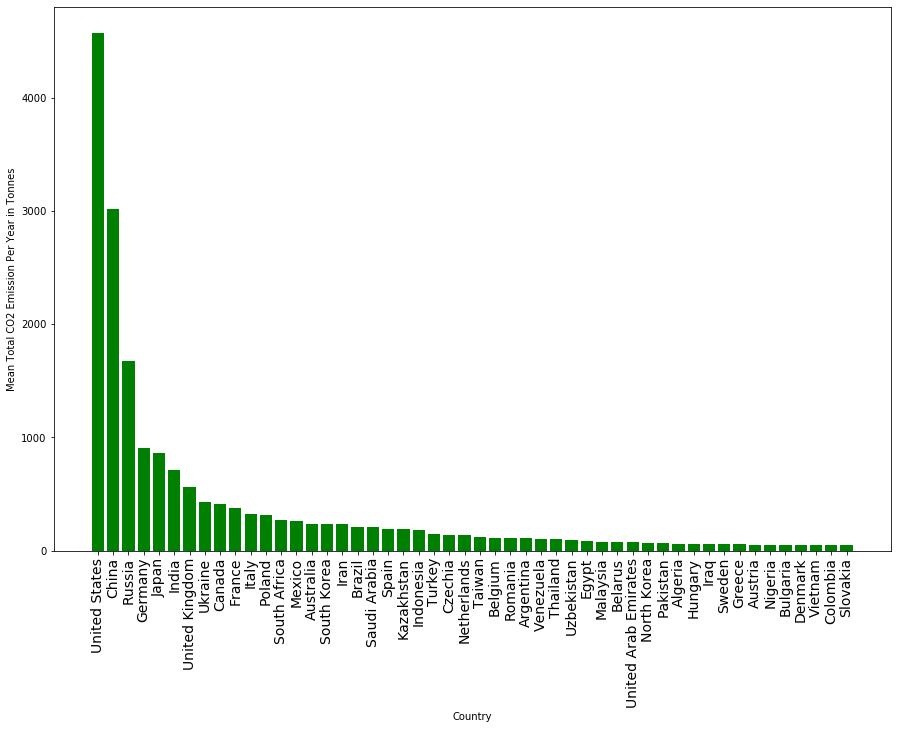

In [6]:
#Visualize top 50 total CO2 emissions by country (note: fix size to make more legible)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = df.groupby(['country'])['co2'].mean().sort_values(ascending=False).index[:50],
        height = df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50],
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean Total CO2 Emission Per Year in Tonnes')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    # specify integer or one of preset strings, e.g.
    #tick.label.set_fontsize('x-small')
    tick.label.set_rotation('vertical')

In [7]:
#Look at top 50 total CO2 emission values by country to determine cut-off point
df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50]

country
United States           4572.443145
China                   3020.410884
Russia                  1678.672633
Germany                  907.555435
Japan                    862.353855
India                    711.136391
United Kingdom           562.317333
Ukraine                  431.599350
Canada                   408.196348
France                   380.734435
Italy                    323.503725
Poland                   315.624159
South Africa             273.030304
Mexico                   263.238609
Australia                239.099464
South Korea              239.019536
Iran                     238.637420
Brazil                   208.254638
Saudi Arabia             207.846739
Spain                    191.898884
Kazakhstan               190.311700
Indonesia                178.857464
Turkey                   143.218507
Czechia                  140.431083
Netherlands              139.889377
Taiwan                   117.495261
Belgium                  111.949609
Romania             

In [8]:
#Create df of top 10 CO2 emmiters per capita, of the top 22 total CO2 emmiters
#Cut off at 22 after Indonesia above due to local dropoff point
top22_co2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:22].index)
df_top22_co2 = df.loc[df['country'].isin(top22_co2)]
top10_percapita = list(df_top22_co2.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)[:10].index)
print(top10_percapita)


['United States', 'Canada', 'Australia', 'Kazakhstan', 'Russia', 'Germany', 'Saudi Arabia', 'United Kingdom', 'Poland', 'Ukraine']


Text(0, 0.5, 'Mean CO2 Emission Per Year Per Capita in Tonnes')

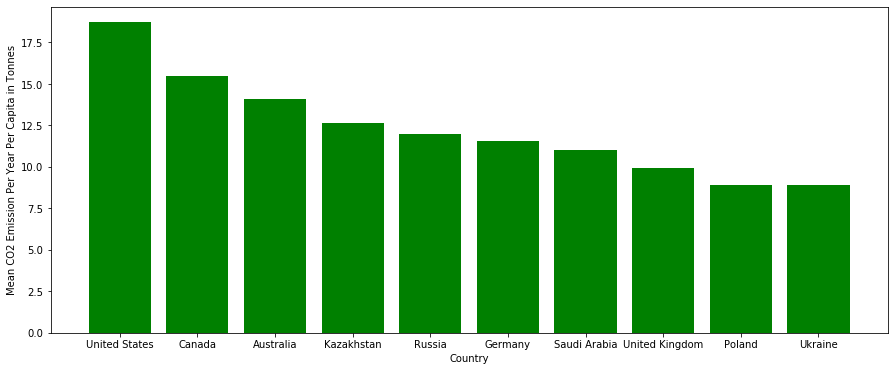

In [9]:
df_top10 = df.loc[df['country'].isin(top10_percapita)]
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False).index,
        height = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False),
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emission Per Year Per Capita in Tonnes')

# Time Series Model for USA

**EDA for USA**

In [10]:
#Reload original df to get pre-1950 USA data
df_USA = data

#Only include USA co2_per_capita data post-1800 (lacking data before this date)
df_USA = df_USA[df_USA['year'] >= 1800]
df_USA = df_USA[df_USA['country'] == 'United States']
df_USA = df_USA[['year','co2_per_capita']]

print(df_USA.shape)

(219, 2)


In [11]:
df_USA['year'] = pd.to_datetime(df_USA['year'],format='%Y')
df_USA.set_index('year', inplace=True)
## Sanity Check
# df_USA.head()

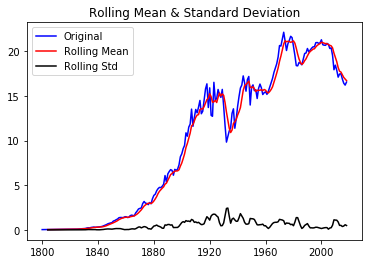

In [12]:
roll_mean = df_USA.rolling(window=5, center=False).mean()
roll_std = df_USA.rolling(window=5, center=False).std()

plt.plot(df_USA,color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Addressing Trends and Stationarity

**Log Transformation**

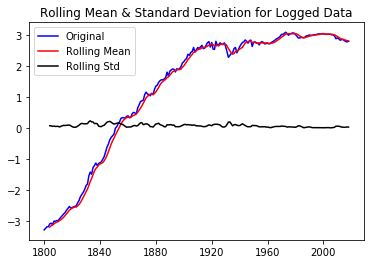

In [13]:
#Log transformation to address lack of variance and covariance
from math import exp
from numpy import log
log_USA = log(df_USA)

roll_mean_log = log_USA.rolling(window=5, center=False).mean()
roll_std_log = log_USA.rolling(window=5, center=False).std()

plt.plot(log_USA,color='blue', label='Original')
plt.plot(roll_mean_log, color='red', label='Rolling Mean')
plt.plot(roll_std_log, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Logged Data')
plt.show(block=False)

In [14]:
#Dickey_Fuller test on log data
#Dickey_Fuller test on rolling mean of log data yielded p value of 0.003,
#so we disregarded as less significant than other options

from statsmodels.tsa.stattools import adfuller

test = adfuller(log_USA['co2_per_capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput


Test Statistic                  -3.807340
p-value                          0.002833
#Lags Used                       3.000000
Number of Observations Used    213.000000
dtype: float64

**Differencing**

In [15]:
#Get differenced values of original dataset to compare Dickey-Fuller p-value to log data
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})

#Dickey-Fuller test on differenced data
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput


Test Statistic                  -4.055314
p-value                          0.001147
#Lags Used                      11.000000
Number of Observations Used    205.000000
dtype: float64

## Model Logged and Original Data

### Logged Data

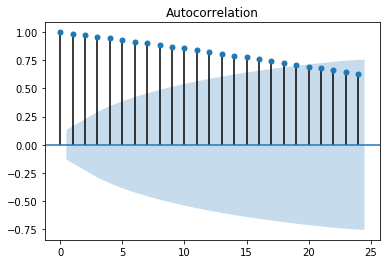

In [16]:
#ACF for logged data
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_USA[:-1], alpha=.05);

##NOTE: data is geometric! (indicates AR)

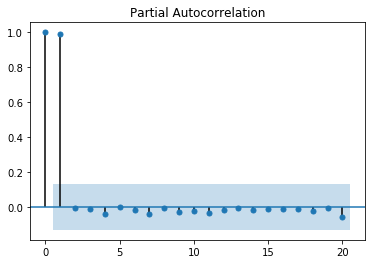

In [17]:
#PACF for logged data
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(log_USA[:-1], alpha=.05, lags=20);

##NOTE: lag of 1 is significant

In [18]:
#Instantiate ARIMA model for log
#Tried many parameters and the below were by far the best

from statsmodels.tsa.arima_model import ARIMA

#fit model
log_mod = ARIMA(log_USA[:-1], order=(2,0,0)) # p,d,q
log_mod_fit = log_mod.fit()
print(log_mod_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:         co2_per_capita   No. Observations:                  218
Model:                     ARMA(2, 0)   Log Likelihood                 240.613
Method:                       css-mle   S.D. of innovations              0.079
Date:                Thu, 28 Jan 2021   AIC                           -473.226
Time:                        11:57:26   BIC                           -459.688
Sample:                    01-01-1800   HQIC                          -467.758
                         - 01-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1865      2.927     -0.064      0.949      -5.924       5.551
ar.L1.co2_per_capita     1.1387      0.022     51.069      0.000       1.095       1.182
ar.L2.co2_pe

### Original Data

Will incorporate differenced data through d parameter in the ARIMA model

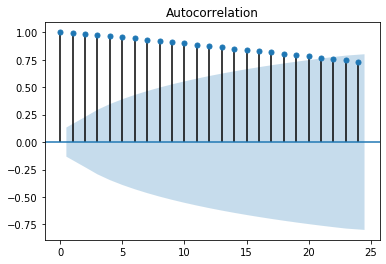

In [19]:
#ACF for original data
plot_acf(df_USA[:-1], alpha=.05);

##NOTE: data is geometric! (indicates AR)

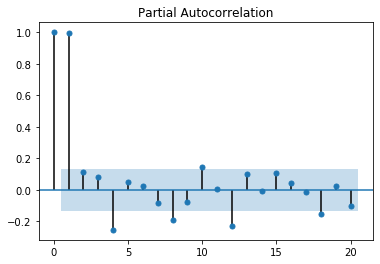

In [20]:
#PACF for original data
plot_pacf(df_USA[:-1], alpha=.05, lags=20);

##NOTE: lag of 1 is significant

Exploring different parameters to find best p-value

In [21]:
from statsmodels.tsa.arima_model import ARIMA

#fit model
mod123 = ARIMA(df_USA[:-1], order=(1,2,3)) # p,d,q
mod123_fit = mod123.fit()
print(mod123_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -249.331
Method:                       css-mle   S.D. of innovations              0.761
Date:                Thu, 28 Jan 2021   AIC                            510.663
Time:                        11:57:28   BIC                            530.915
Sample:                    01-01-1802   HQIC                           518.845
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0006      0.001     -0.425      0.671      -0.003       0.002
ar.L1.D2.co2_per_capita    -0.7431      0.113     -6.549      0.000      -0.965      -0.521


In [22]:
#fit model
mod420 = ARIMA(df_USA[:-1], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit(disp=0)
print(mod420_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -264.456
Method:                       css-mle   S.D. of innovations              0.821
Date:                Thu, 28 Jan 2021   AIC                            540.912
Time:                        11:57:29   BIC                            561.164
Sample:                    01-01-1802   HQIC                           549.094
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.017     -0.088      0.930      -0.036       0.033
ar.L1.D2.co2_per_capita    -0.9221      0.067    -13.798      0.000      -1.053      -0.791


In [23]:
#fit model
mod520 = ARIMA(df_USA[:-1], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit(disp=0)
print(mod520_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -260.117
Method:                       css-mle   S.D. of innovations              0.804
Date:                Thu, 28 Jan 2021   AIC                            534.233
Time:                        11:57:30   BIC                            557.860
Sample:                    01-01-1802   HQIC                           543.778
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0014      0.014     -0.102      0.919      -0.029       0.026
ar.L1.D2.co2_per_capita    -0.9588      0.067    -14.395      0.000      -1.089      -0.828


# Determine Best Model

### RMSE 

#### Logged Data

In [24]:
#train test split (90%)

X = log_USA.index
y = log_USA['co2_per_capita']

train = log_USA.loc[:'1997-01-01']
test = log_USA.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2_per_capita'] , test['co2_per_capita']


In [25]:
# Instantiate and fit model to train data
mod_log = ARIMA(train[2:], order=(2,0,0)) # p,d,q
mod_log_fit = mod_log.fit()

# Prediction
pred_log = mod_log_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


#### Original Data

In [26]:
#Train test split (90%)
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})
diff2 = diff.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})

X = diff2.index
y = diff2['Differenced Observations']

train = diff2.loc[:'1997-01-01']
test = diff2.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['Differenced Observations'] , test['Differenced Observations']


In [28]:
# 420 data
# Instantiate and fit model to train data
mod420 = ARIMA(y_train[2:], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit()

#Prediction
pred420 = mod420_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [29]:
# 520 data
# Instantiate and fit model to train data
mod520 = ARIMA(y_train[2:], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit()

#Prediction
pred520 = mod520_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [27]:
#Below model cannot run due to coefficients not being invertible

# # 123 data
# # Instantiate and fit model to train data
# mod123 = ARIMA(y_train[2:], order=(1,2,3)) # p,d,q
# mod123_fit = mod123.fit()

# #Prediction
# pred123 = mod123_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

#### Testing out Auto ARIMA

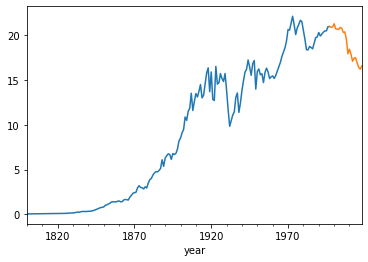

In [47]:

train = df_USA.loc[:'1997-01-01']
valid = df_USA.loc['1997-01-01':]

# #divide into train and validation set
# train = df_USA[:int(0.7*(len(data)))]
# valid = df_USA[int(0.7*(len(data))):]

# #preprocessing (since arima takes univariate series as input)
# train.drop('Month',axis=1,inplace=True)
# valid.drop('Month',axis=1,inplace=True)

#plotting the data
train['co2_per_capita'].plot()
valid['co2_per_capita'].plot()

In [49]:
! pip install pyramid

     |████████████████████████████████| 326 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 204 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 7.3 MB/s eta 0:00:01


In [50]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

ModuleNotFoundError: No module named 'pyramid.arima'

#### testing metrics

In [30]:
def RMSE(pred):
    return np.sqrt(((pred-y_test)**2).mean())

print('RMSE score for log: ', RMSE(pred_log))
print('RMSE score for 4,2,0: ', RMSE(pred420))
print('RMSE score for 5,2,0: ', RMSE(pred520))

RMSE score for log:  3.1167130056556056
RMSE score for 4,2,0:  0.8080931747605845
RMSE score for 5,2,0:  0.725163415202824


In [31]:
AIC_420 = mod420_fit.aic
AIC_520 = mod520_fit.aic
AIC_log = log_mod_fit.aic

print(AIC_420)
print(AIC_520)
print(AIC_log)

702.1006808330858
685.704458463559
-473.2258980362311


**Exploring best model**

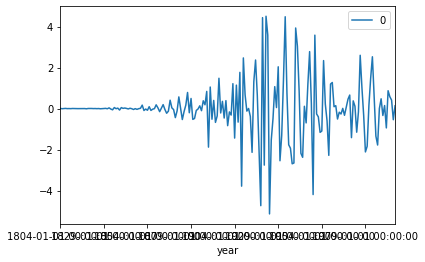

In [32]:
# Visualize residuals/error
residuals_520 = pd.DataFrame(mod520_fit.resid)
residuals_520.plot()
pyplot.show();


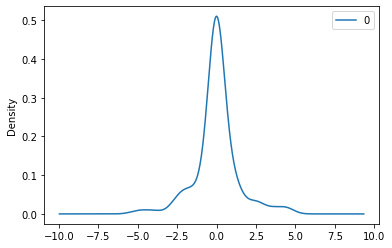

In [33]:
# Check for linearity
residuals = pd.DataFrame(mod520_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

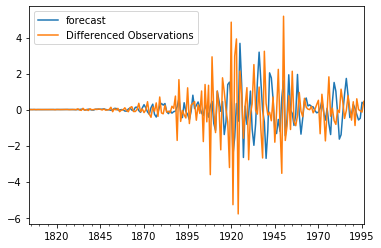

In [51]:
# Visualize prediction
mod520_fit.plot_predict();

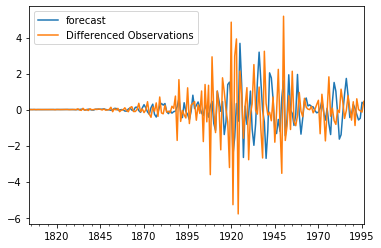

In [34]:
# Visualize prediction
mod520_fit.plot_predict();


In [35]:
mod520_fit.forecast()[0] # 0 indicates the very next value the model predicts??


array([-0.00535786])

# Additional Notes

In [36]:
y_test.diff(1)

year
1997-01-01 00:00:00      NaN
1998-01-01 00:00:00    0.326
1999-01-01 00:00:00    0.235
2000-01-01 00:00:00    0.205
2001-01-01 00:00:00   -1.248
2002-01-01 00:00:00    1.434
2003-01-01 00:00:00   -0.482
2004-01-01 00:00:00    0.193
2005-01-01 00:00:00   -0.539
2006-01-01 00:00:00   -0.046
2007-01-01 00:00:00    0.887
2008-01-01 00:00:00   -1.443
2009-01-01 00:00:00    0.168
2010-01-01 00:00:00    2.858
2011-01-01 00:00:00   -3.182
2012-01-01 00:00:00    0.853
2013-01-01 00:00:00    1.349
2014-01-01 00:00:00   -1.450
2015-01-01 00:00:00   -0.295
2016-01-01 00:00:00    0.728
2017-01-01 00:00:00    0.144
2018-01-01 00:00:00    0.304
Name: Differenced Observations, dtype: float64

In [37]:
#choose top 50 countries by co2 emissions (not per capita)
#time series based on co2 emissions (not per capita)
#observe per capita data via visualizations

**Tuesday**

-Initial time series model (check for stationarity/trends, fix if not)--top 10 countries (not per capita)

-Vizualizations for top 10 countries per capita

**Wednesday**

-Fix whatever needs fixing

-Other EDA/visualizations

-Tune final model

**Thursday**

-Tune final model (if not done by Wed)

-Create Read Me, PPT presentation

-Clean up code

-Practice presentation

**Stretch Goals**

-Research peaks and valleys historically

-Compare to world emissions
